# Penda Health Data Analysis

This is a notebook prepared to help in the data analysis for patient's data, consultations as well as capitation information.


## Analysis Design

1. Business Understanding : Understanding and assessing the business situation and goals. <br>

2. Data Understanding and Exploration 
  * Prerequisites
     * Load requisite libraries 
     * Load and preview datasets.
  * Data requirements understanding (Select the fundamental variables / features relevant to the business problem). <br>

3. Data Preparation and Analysis
  * Data quality assessment (Accuracy, Completeness, Consistency, Currency, Relevance, Validity and Uniqueness).
  * Data cleaning
  * Data integration and formatting
  * Data transformation (merging datasets, reformatting fields, filtering records, ...) and enrichment (feature engineering)

4. Solution Implementation & Reporting

## **1. Business Scenario**

We have been provided with patient data and different business scenarios which we are supposed to analyse and answer specific questions based on the data provided.

## **2. Data Understanding and Exploration**

In [ ]:
# Loading necessary libraries for data manipulation, number crunching and viz respectively.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install s3fs

In [ ]:
# Loading the patient dataset from Amazon AWS S3 bucket and previewing first 5 records.

import s3fs

# aws_access_key_id = 
# aws_secret_access_key = 
# aws_session_token = 

patients3_df = pd.read_csv('s3://pendahealth-assessment/patient_data.csv')
patients3_df.head()

In [ ]:
# Load patient dataset and sample first 5 records

patient_df = pd.read_csv('patient_data.csv')
patient_df.head()

,patient_id,dob,gender
0,PAT10000,8/12/2014,Male
1,PAT10001,11/18/2013,Female
2,PAT10002,5/27/2001,Female
3,PAT10003,8/1/2015,Female
4,PAT10004,3/5/1983,Female


In [ ]:
# Sample last 5 records of patient dataset

patient_df.tail()

,patient_id,dob,gender
14411,PAT25176,1/24/1996,Female
14412,PAT25177,8/12/2016,Male
14413,PAT25178,12/10/1985,Female
14414,PAT25179,8/23/1968,Male
14415,PAT25180,6/18/2014,Female


In [ ]:
patient_df.shape

(14416, 3)

In [ ]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14416 entries, 0 to 14415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  14416 non-null  object
 1   dob         14416 non-null  object
 2   gender      14416 non-null  object
dtypes: object(3)
memory usage: 338.0+ KB


In [ ]:
# Load patients visits records and sample first 5 and last 5 records

visits_df = pd.read_csv('visits_data.csv')
visits_df.head()

,visit_date,patient_id,location,payor,invoice_total
0,7/21/2019,PAT24869,Kahawa West,Cash,1350.0
1,5/28/2019,PAT17185,Embakasi,Cash,600.0
2,12/29/2019,PAT19895,Zimmerman,Cash,140.0
3,7/3/2019,PAT20790,Pipeline,Cash,325.0
4,9/22/2019,PAT12119,Huruma,Cash,300.0


In [ ]:
visits_df.tail()

,visit_date,patient_id,location,payor,invoice_total
80864,NaN,NaN,NaN,NaN,NaN
80865,NaN,NaN,NaN,NaN,NaN
80866,NaN,NaN,NaN,NaN,NaN
80867,NaN,NaN,NaN,NaN,NaN
80868,NaN,NaN,NaN,NaN,NaN


In [ ]:
visits_df.shape

(80869, 5)

In [ ]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80869 entries, 0 to 80868
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visit_date     80669 non-null  object 
 1   patient_id     80669 non-null  object 
 2   location       80669 non-null  object 
 3   payor          80669 non-null  object 
 4   invoice_total  80669 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.1+ MB


 **From the above, we note the following.**
 1. There are 14,416 registered patients in Penda Health in the year 2019.
 2. There are 80,869 records of patients visit to Penda Health outlets in 2019. We also notice that the visits dataset has a number of null entries which we will clean and report the adjusted and valid number of records.

## **3. Data Preparation and Analysis**

### **3.1 Data Quality Checks**

In [ ]:
# Completeness quality check. Do we have null entries in these datasets?

patient_df.isnull().sum()

patient_id    0
dob           0
gender        0
dtype: int64

In [ ]:
visits_df.isnull().sum()

visit_date       200
patient_id       200
location         200
payor            200
invoice_total    200
dtype: int64

In [ ]:
# remove the null entries in the visits dataset and update its dimensions.

visits_df = visits_df.dropna(axis=0, how='all')
visits_df.shape

(80669, 5)

In [ ]:
# Uniqueness quality check: See if we have any duplicated records in each of the datasets.

patient_df.duplicated().any()

False

In [ ]:
visits_df.duplicated().any()

True

In [ ]:
# Investigate the duplicated records.

duplicates_df = visits_df[visits_df.duplicated()]
duplicates_df

,visit_date,patient_id,location,payor,invoice_total
48032,10/11/2019,PAT11046,Kayole,Cash,0.0


In [ ]:
# Show all the records that match the duplicate report above.

visits_df[visits_df.patient_id.isin(['PAT11046'])].sort_values(by='visit_date', ascending=1)

,visit_date,patient_id,location,payor,invoice_total
48030,10/11/2019,PAT11046,Kayole,Cash,0.0
48032,10/11/2019,PAT11046,Kayole,Cash,0.0
48221,11/28/2019,PAT11046,Tassia,Britam,450.0
47331,4/26/2019,PAT11046,Kangemi,Cash,50.0
47336,4/27/2019,PAT11046,Umoja,Jubilee,6400.0
47479,6/1/2019,PAT11046,Pipeline,Cash,1500.0
47807,8/17/2019,PAT11046,Embakasi,Cash,710.0


In [ ]:
# Validity quality check. confirm the datatypes of the fields for eaase of manipulation later in the analysis.

print('Data Types for Patients Dataset\n',patient_df.dtypes, '\n\n')
print('Data Types for Patient Visits Dataset\n',visits_df.dtypes)

Data Types for Patients Dataset
 patient_id    object
dob           object
gender        object
dtype: object 


Data Types for Patient Visits Dataset
 visit_date        object
patient_id        object
location          object
payor             object
invoice_total    float64
dtype: object


In [ ]:
# Data type conversion for the dates field

patient_df['dob'] = pd.to_datetime(patient_df.dob)
visits_df['visit_date'] = pd.to_datetime(visits_df.visit_date)

# Confirm the conversion
print('Data Types for Patients Dataset\n',patient_df.dtypes, '\n\n')
print('Data Types for Patient Visits Dataset\n',visits_df.dtypes)

Data Types for Patients Dataset
 patient_id            object
dob           datetime64[ns]
gender                object
dtype: object 


Data Types for Patient Visits Dataset
 visit_date       datetime64[ns]
patient_id               object
location                 object
payor                    object
invoice_total           float64
dtype: object


In [ ]:
# Consistency quality check. confirm that all data categories are entered consistently.. Cash, CASH, cash etc.

visits_df.payor.value_counts()

Cash             60505
CIC Photocard     4484
Britam            4165
Resolution        2039
Madison           2026
UAP               2014
CIC Corporate     1982
AON               1978
Jubilee           1250
Sunshine Ltd.      226
Name: payor, dtype: int64

In [ ]:
patient_df.gender.value_counts()

Female    7893
Male      6523
Name: gender, dtype: int64

**We notice that:**
1. There are duplicated records in the visits dataset and this is quite alright since a patient can visit a hospital twice in a day. Further more, we do not have a unique field for each of the visits in the dataset. We therefore retain these records as valid.
2. The visit_date and date_of_birth fields had been stored as text / character and so we have converted them to date_time format for consistency and ease of manipuation later on in the analysis. All other fields are well presented.
3. There are 10 modes of payments, 9 of which are capitation based.

### **3.2 Data Transformations**

In [ ]:
# Merge the records from each of these datasets to have a complete profile of the patients.

merged_df = visits_df.merge(patient_df, how='left', on='patient_id')
merged_df.head()

,visit_date,patient_id,location,payor,invoice_total,dob,gender
0,2019-07-21,PAT24869,Kahawa West,Cash,1350.0,2019-07-21,Male
1,2019-05-28,PAT17185,Embakasi,Cash,600.0,2019-05-28,Female
2,2019-12-29,PAT19895,Zimmerman,Cash,140.0,2019-12-29,Female
3,2019-07-03,PAT20790,Pipeline,Cash,325.0,2019-07-03,Male
4,2019-09-22,PAT12119,Huruma,Cash,300.0,2019-09-22,Male


In [ ]:
merged_df.shape

(80669, 7)

In [ ]:
# Check if we have any nulls in the new dataset.

merged_df.isnull().any()

visit_date       False
patient_id       False
location         False
payor            False
invoice_total    False
dob              False
gender           False
dtype: bool

In [ ]:
# Check to see if all registered patients have paid visits to the hospital.

merged_df.patient_id.value_counts().count()

13840

In [ ]:
# recheck of the above by selecting unique values of patient ID

merged_df['patient_id'].nunique()

13840

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80669 entries, 0 to 80668
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   visit_date     80669 non-null  datetime64[ns]
 1   patient_id     80669 non-null  object        
 2   location       80669 non-null  object        
 3   payor          80669 non-null  object        
 4   invoice_total  80669 non-null  float64       
 5   dob            80669 non-null  datetime64[ns]
 6   gender         80669 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 4.9+ MB


**From the above analysis, we are able to establish that;**
1. Out of the 14,416 registered patients in Penda Health, only 13,840 made their visits to the hospital in the year 2019. 576 patients did not.
2. All the visits to the hospital in 2019 were made by registered patients. we have been able to match all the records with the corresponding records in the registration dataset.

This Dataset now presents a clean copy which is ready for analysis.

## **4. Solution Implementation & Reporting**

**General Questions**

#### **1. For cash visits, what is the average age of female patients who visited between the start of February and the end of April in 2019?**

In [ ]:
# Introduce the age_days colummn in this dataset as a calculated field.

now = pd.Timestamp('now')
merged_df['dob'] = pd.to_datetime(merged_df['dob'], format='%m%d%y')
merged_df['dob'] = merged_df['dob'].where(merged_df['dob'] < now, merged_df['dob'] -  np.timedelta64(100, 'D'))
merged_df['age_days'] = (now - merged_df['dob']).astype('<m8[D]')
merged_df["age_year"] = merged_df["dob"].apply(lambda x : (pd.datetime.now().year - x.year))
merged_df["age_year1"] = round(merged_df["age_days"] / 365,2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


In [ ]:
merged_df.head()

,visit_date,patient_id,location,payor,invoice_total,dob,gender,age_days,age_year,age_year1
0,2019-07-21,PAT24869,Kahawa West,Cash,1350.0,2019-07-21,Male,505.0,1,1.38
1,2019-05-28,PAT17185,Embakasi,Cash,600.0,2019-05-28,Female,559.0,1,1.53
2,2019-12-29,PAT19895,Zimmerman,Cash,140.0,2019-12-29,Female,344.0,1,0.94
3,2019-07-03,PAT20790,Pipeline,Cash,325.0,2019-07-03,Male,523.0,1,1.43
4,2019-09-22,PAT12119,Huruma,Cash,300.0,2019-09-22,Male,442.0,1,1.21


In [ ]:
# Save this dataset on disk for future retrieval.

merged_df.to_csv('patient_records.csv', index=False)

In [ ]:
# Read the csv file and parse dates from column index 0: visit_date
q1_df = pd.read_csv('patient_records.csv', parse_dates=True, index_col=0)
q1_df.head()

,patient_id,location,payor,invoice_total,dob,gender,age_days,age_year,age_year1
visit_date,,,,,,,,,
2019-07-21,PAT24869,Kahawa West,Cash,1350.0,2019-07-21,Male,505.0,1,1.38
2019-05-28,PAT17185,Embakasi,Cash,600.0,2019-05-28,Female,559.0,1,1.53
2019-12-29,PAT19895,Zimmerman,Cash,140.0,2019-12-29,Female,344.0,1,0.94
2019-07-03,PAT20790,Pipeline,Cash,325.0,2019-07-03,Male,523.0,1,1.43
2019-09-22,PAT12119,Huruma,Cash,300.0,2019-09-22,Male,442.0,1,1.21


In [ ]:
# desired record filtered by dates
q1_df = q1_df.loc['2019-02-01' : '2019-04-30']
q1_df.head()

,patient_id,location,payor,invoice_total,dob,gender,age_days,age_year,age_year1
visit_date,,,,,,,,,
2019-04-06,PAT18541,Kayole,Cash,50.0,2019-04-06,Male,611.0,1,1.67
2019-02-22,PAT14342,Zimmerman,Cash,630.0,2019-02-22,Female,654.0,1,1.79
2019-04-21,PAT17951,Embakasi,Cash,820.0,2019-04-21,Female,596.0,1,1.63
2019-03-23,PAT10075,Kayole,Cash,800.0,2019-03-23,Female,625.0,1,1.71
2019-04-14,PAT16355,Kayole,Cash,200.0,2019-04-14,Male,603.0,1,1.65


In [ ]:
# Create a dataframe for cash records between 2019-02-01 and 2019-04-30.

q1_df = q1_df[(q1_df.payor.isin(['Cash'])) & (q1_df.gender.isin(['Female']))]
q1_df.head()

,patient_id,location,payor,invoice_total,dob,gender,age_days,age_year,age_year1
visit_date,,,,,,,,,
2019-02-22,PAT14342,Zimmerman,Cash,630.0,2019-02-22,Female,654.0,1,1.79
2019-04-21,PAT17951,Embakasi,Cash,820.0,2019-04-21,Female,596.0,1,1.63
2019-03-23,PAT10075,Kayole,Cash,800.0,2019-03-23,Female,625.0,1,1.71
2019-03-24,PAT15927,Githurai 45,Cash,100.0,2019-03-23,Female,625.0,1,1.71
2019-03-13,PAT23596,Kangemi,Cash,520.0,2019-03-12,Female,636.0,1,1.74


In [ ]:
# Compute the average age 

print('The average age in days is :',round(q1_df['age_days'].mean(),2), '\n')
print('The average age in years is :',round(q1_df['age_year'].mean(),2), '\n')
print('The average age in years is :',round(q1_df['age_year1'].mean(),2), '\n')
print('The average age in years is :',round(q1_df['age_days'].mean()/365,2))

The average age in days is : 8174.2 

The average age in years is : 21.94 

The average age in years is : 22.39 

The average age in years is : 22.4


**2.	What is the total cost to the hospital of all cash visits by males in October 2019? Assume an average gross margin of 45% per visit**

In [ ]:
# Cost is calculated by Revenue Less (Gross Margin * Revenue)

# Read the csv file and parse dates from column index 0: visit_date
q2_df = pd.read_csv('patient_records.csv', parse_dates=True, index_col=0)

# select October records, then filter by Cash Payor and Male gender.
q2_df = q2_df.loc['2019-10-01' : '2019-10-31']
q2_df = q2_df[(q2_df.payor.isin(['Cash'])) & (q2_df.gender.isin(['Male']))]

# compute revenue
# myrevenue = q2_df['invoice_total'][['invoice_total']].sum()
myrevenue = q2_df[(q2_df.payor.isin(['Cash'])) & (q2_df.gender.isin(['Male']))]['invoice_total'].sum()
print('The revenue is Ksh. ', myrevenue)

# compute cost given by Revenue Less (Gross Margin * Revenue)
cost = myrevenue-(0.45*myrevenue)
print('Gross Margin is 45%')
print('The Cost is Ksh.', round(cost))


The revenue is Ksh.  1513065.5
Gross Margin is 45%
The Cost is Ksh. 832186.0


**3. On average, how much were female patients between the ages of 18-35 (including 35 year-olds) invoiced per visit in 2019?**

In [ ]:
# Compute the total cost of invoice 

# Read the csv file
q3_df = pd.read_csv('patient_records.csv')
invoice = q3_df[(q3_df['age_year1']>18) & (q3_df['age_year1']<35) & (q3_df.gender.isin(['Female']))]['invoice_total'].sum()
count = q3_df[(q3_df['age_year1']>18) & (q3_df['age_year1']<35) & (q3_df.gender.isin(['Female']))]['invoice_total'].value_counts().sum()

print('Average invoice per visit is Ksh.', round(invoice/count,2))


Average invoice per visit is Ksh. 1077.0


In [ ]:
len(q3_df)

80669

**4. What percentage of visits are by female children between the ages of 0-5 (including 5 year-olds) in 2019?**

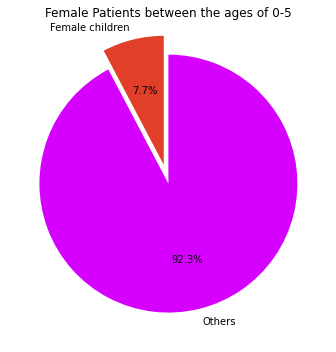

In [ ]:
# Get the data to work with

q4_df = q3_df
minor_count = q4_df[(q4_df['age_year1']>0) & (q4_df['age_year1']<5) & (q3_df.gender.isin(['Female']))]['gender'].value_counts().sum()
others = len(q4_df) - minor_count

plt.figure(figsize=(5,5))
colors = ["#E13F29", "#D600FF"]
patients = [minor_count, others]

patient_labels = ['Female children','Others']
plt.pie(patients, labels = patient_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.15, 0))
plt.title('Female Patients between the ages of 0-5')
plt.tight_layout();

****

**Capitation Schemes Section I**

We are involved in a capitation agreement with one private company (Sunshine Ltd.), where we provide medical care to their employees based on a capitated fee. Another company, TechLab Ltd., also want to go into a capitation agreement with us in order to provide healthcare to their employees.

Sunshine Ltd. is paying us Ksh. 2,000 per person per year, and have 200 people signed up on the scheme with us.
TechLab Ltd. are offering us Ksh 1,500 per person per year, and have 500 people that they would like to sign up with us.


**1. How much revenue could we expect to make from TechLab Ltd.’s offer in a one year period?**

**2. How many times can we expect TechLab Ltd.’s employees to visit us in a one year period if we accept their offer?**

**3. Explain how you arrived at your answer in 2. above.**

**4. Using the data provided, estimate the total cost to Penda for the visits from TechLab Ltd. over a one year period. Assume that all non-capitation visits have a gross margin of 45%, and that capitation visits access a similar range of services – in other words, 
Assume that capitation visits cost Penda the same amount as non-capitation visits on average.**

**5. How much profit or loss do you expect Penda would make should Penda accept TechLab Ltd.’s offer? (If you expect a loss, express it as a negative integer.)**

****

**Capitation Schemes Section 2**

One risk with capitation schemes is that we may experience cannibalization – in other words, some of the patients on the capitation scheme may have already been using Penda Health for medical services, and will now move over to the capitated scheme rather than paying us for services accessed.

For example, if patient with unique PatientID PAT123456 previously payed cash for medical services, and visited Penda Health on average twice a year, with an average bill size of Sh700, and this patient is now placed on a capitated scheme by their employer, they will now have the option to visit Penda Health as many times as they would like without paying at all.

Given the above, it is important for us to understand the effect of cannibalization when we consider capitation agreements.


**1. How many Sunshine Ltd. patients also visited Penda Health under a different payor? Give the number of unique patients, not the number of visits.**

**2. If the non-Sunshine Ltd. visits for these patients had been billed under Sunshine Ltd. instead, how much revenue would Penda have lost.**

**3. If you assume that 50% of visits from Sunshine Ltd. in 2019 would have occurred anyway even if Penda had not accepted the capitation agreement with Sunshine Ltd., and that these visits would have had an average invoice amount equal to that of cash visits, how much revenue Penda would have made from these visits?** 

**4. What was the gross margin for the Sunshine Ltd. scheme in 2019? Again, assume that capitation visits utilize similar services to non-capitation visits (and so have the same average cost), and that non-capitation visits have a gross margin of 45%.**